In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [2]:
S = 0.1
BETA = 9

関数を定義

In [3]:
def f(x):
    return -100 * x * (x-0.5)**2 * (x-1)

N個の適当なサンプル点を設定し、観測データ {$x_n, t_n$}を生成

In [8]:
N=100
xs = np.arange(0, 1.01, 0.02)
ts = f(xs) + np.random.normal(loc=0.0, scale=0.1)

既定関数$\phi_m(x)$を定義する

In [ ]:

# Define Density function
def ndist(x, mu=0., sigma=1.):
    coef = 1./np.sqrt(2. * np.pi * sigma**2)
    dnst = np.exp(-.5 * ((x-mu)/sigma)**2)
    return coef * dnst

tmu = 1
tsigma = 1
N = 100

# Ideal Density curve
xx = np.linspace(tmu-4*tsigma, tmu+4*tsigma)
truecurve = ndist(xx, tmu, tsigma)

#Generate N Sample data as xsamp
xsamp = tmu + tsigma * np.random.randn(N)

#Inference of parameters
mu = 1./N*xsamp.sum()  # np.mean(xsamp)
sigma = np.sqrt(1./N*((xsamp-mu)**2).sum())  # np.sqrt(np.mean((xsamp-mu)**2))
estcurve = ndist(xx, mu, sigma)

plt.hist(xsamp, normed=True, alpha=0.5)
plt.plot(xx, truecurve, 'g-', linewidth=2)
plt.plot(xx, estcurve, 'r-', linewidth=2)
plt.show()

乱数を発生させてからmu sigmaをM回繰り返して最尤推定して、
mu, sigmaの期待値を評価する

mu:    0.996649
sigma: 0.995148


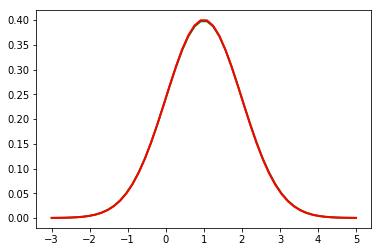

In [2]:
%matplotlib inline
import numpy as np
import matplotlib,pylab as plt

# Define Density function
def ndist(x, mu=0., sigma=1.):
    coef = 1./np.sqrt(2. * np.pi * sigma**2)
    dnst = np.exp(-.5 * ((x-mu)/sigma)**2)
    return coef * dnst

tmu = 1
tsigma = 1
#N = 100

# Ideal Density curve
xx = np.linspace(tmu-4*tsigma, tmu+4*tsigma)
truecurve = ndist(xx, tmu, tsigma)

# Maximul Likelihood inference in M times
M = 1000
mu = np.array([])
sigma = np.array([])
for i in range(M):
    #Generate N Sample data as xsamp
    xsamp = tmu + tsigma * np.random.randn(N)

    #Inference of parameters
    mu = np.append(mu, 1./N*xsamp.sum())
    sigma = np.append(sigma, np.sqrt(1./N*((xsamp-mu[i])**2).sum()))


# Expected value
mu_expection = np.mean(mu)  # mu.sum()/M
sigma_expection = np.mean(sigma)  # sigma.sum()/M
estcurve = ndist(xx, mu_expection, sigma_expection)

print "mu:    %f" % mu_expection
print "sigma: %f" % sigma_expection

plt.plot(xx, truecurve, 'g-', linewidth=2)
plt.plot(xx, estcurve, 'r-', linewidth=2)
plt.show()

In [3]:
tmus = []
tsigmas = []
mus = []
sigmas = []

tmu = 1
tsigma = 1
# Ideal Density curve
xrng = range(1000)
for i in range(1000):
    N = i
    # Generate Sample data as xsamp
    xsamp = tmu + tsigma * np.random.randn( N )
    # Inference of parameters
    mu = np.mean( xsamp )
    sigma = np.sqrt( np.mean(xsamp**2) - mu**2 )
    tmus.append(tmu)
    tsigmas.append(tsigma)
    mus.append(mu)
    sigmas.append(sigma)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


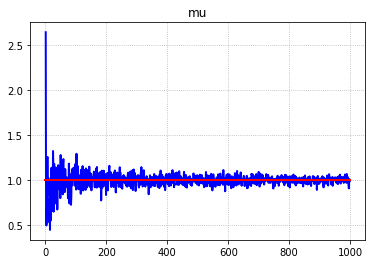

In [4]:
plt.plot( xrng, mus, 'b-', linewidth=2 )
plt.plot( xrng, tmus, 'r-', linewidth=2 )
plt.grid(linestyle=':')
plt.title("mu")
plt.show()

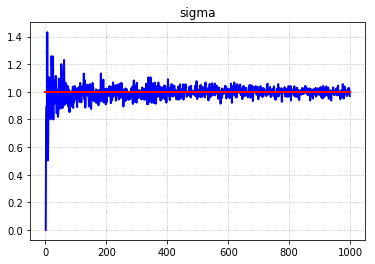

In [5]:
plt.plot( xrng, sigmas, 'b-', linewidth=2 )
plt.plot( xrng, tsigmas, 'r-', linewidth=2 )
plt.grid(linestyle=':')
plt.title("sigma")
plt.show()

In [11]:
tmus[-2]

1